In [93]:
#cd E:\haris\Climate_Analytics\PROVIDE\UBC\Five_models\ssp245_fivemodels\GFDL\historical_seasonal

In [94]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  # sklearn

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import datetime

sns.set(style='darkgrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
df1= pd.read_csv('./TMAX_Final/TMAX_Final/SAIDU SHARIF_tmax_final.csv')
df2=pd.read_csv('SaiduSharifAeromet.csv') #combined file
df1['time'] =pd.to_datetime(df1['time'])
df2['Time'] =pd.to_datetime(df2['Time'])

df1 = df1.set_index(['time'])

df2 = df2.set_index(['Time'])


In [96]:
train_df = list(df2['tasmax'])
target_df = list(df1['max'])
train_data1 = {'Time': df2.index,'tasmax': train_df}
 
train = pd.DataFrame(train_data1)

target_data = {'time': df1.index,'max': target_df}
 
# Create DataFrame
target= pd.DataFrame(target_data)

In [97]:
import pandas as pd
import numpy as np

# Read your CSV file into a DataFrame
train_data1 = pd.read_csv('Faisalabad.csv')  # Replace 'your_file.csv' with the actual file path

# Assuming 'tasmax' is the column name containing temperature data
# Calculate Z-scores
z_scores = (train_data1['tasmax'] - train_data1['tasmax'].mean()) / train_data1['tasmax'].std()

# Define a threshold (e.g., 3 or -3)
threshold = 3

# Detect outlierss
outliers = train_data1[np.abs(z_scores) > threshold]

# Remove outliers
train_data = train_data1[np.abs(z_scores) <= threshold]

# Display outliers and cleaned dataset
print("Detected outliers:")
print(outliers)
print("\nCleaned training dataset:")
print(train_data)


Detected outliers:
Empty DataFrame
Columns: [Time, tasmax]
Index: []

Cleaned training dataset:
                      Time     tasmax
0      2006-01-01 12:00:00  18.623710
1      2006-01-02 12:00:00  18.753881
2      2006-01-03 12:00:00  18.990923
3      2006-01-04 12:00:00  19.480470
4      2006-01-05 12:00:00  20.647547
...                    ...        ...
34304  2099-12-27 12:00:00  22.650055
34305  2099-12-28 12:00:00  26.174143
34306  2099-12-29 12:00:00  26.427198
34307  2099-12-30 12:00:00  25.868990
34308  2099-12-31 12:00:00  25.097048

[34309 rows x 2 columns]


Text(0, 0.5, 'Temperature [C]')

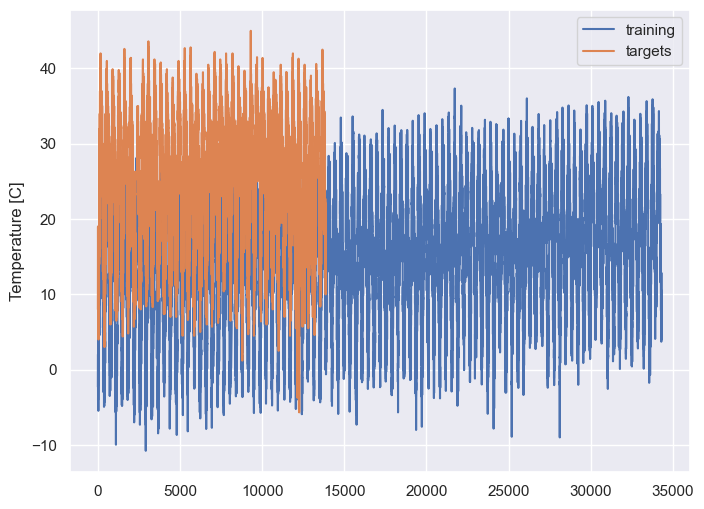

In [98]:
# print a table of the training/targets data
#display(pd.concat({'training': training, 'targets': targets}, axis=1))

# make a plot of the temperature and precipitation data
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8, 6), sharex=True)
# time_slice =slice('1979-01-01','2010-12-31')
# train = training[time_slice]
# target = targets[time_slice]


# train_data , target_data = drop_outlier(train_data = train, target_data = target)
train_data , target_data = train, target
# plot-temperature
train_data['tasmax'].plot(ax=axes, label='training')
target_data['max'].plot(ax=axes, label='targets')
axes.legend()
axes.set_ylabel('Temperature [C]')

In [99]:
train_data = train_data.set_index(['Time'])
target_data = target_data.set_index(['time'])

kmeans 0.7662074085810275
uniform 0.7668543275954396
quantile 0.7664089584219715


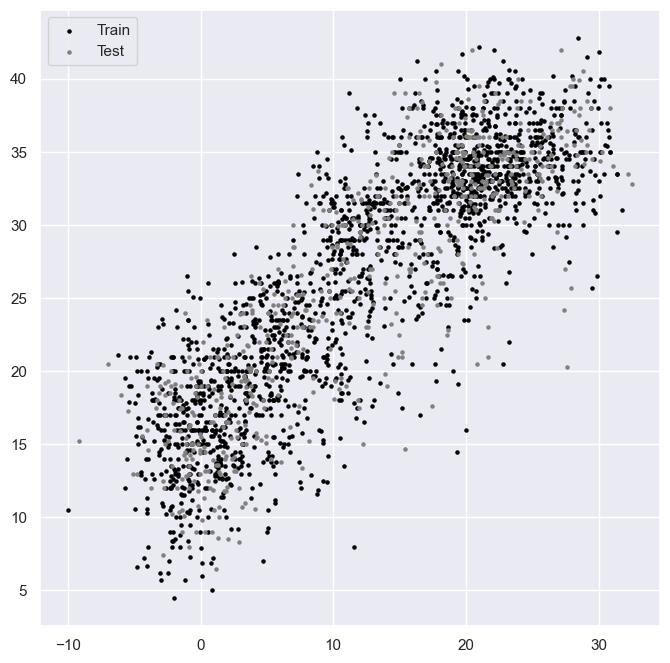

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, KBinsDiscretizer
from mlinsights.mlmodel import PiecewiseRegressor

# Data slicing and extraction
X = train_data[['tasmax']]['1995':'2012'].values
y = target_data[['max']]['1995':'2012'].values

# Ensuring alignment of X and y
min_samples = min(X.shape[0], y.shape[0])
X = X[:min_samples]
y = y[:min_samples]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Preprocessing
xqt = QuantileTransformer(n_quantiles=1000000, copy=True, subsample=1000000).fit(X_train)
Xq_train = xqt.transform(X_train)
Xq_test = xqt.transform(X_test)

yqt = QuantileTransformer(n_quantiles=1000000, copy=True, subsample=1000000).fit(y_train)
yq_train = yqt.transform(y_train.reshape(-1, 1)).ravel()
yq_test = yqt.transform(y_test.reshape(-1, 1)).ravel()

# Model fitting and evaluation
for strat in ['kmeans', 'uniform', 'quantile']:
    model = PiecewiseRegressor(binner=KBinsDiscretizer(n_bins=7, strategy=strat))
    model.fit(X_train, y_train)
    print(strat, model.score(X_test, y_test))  # Print the scores for each strategy

# Visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(X_train, y_train, c='black', s=5, label='Train')
plt.scatter(X_test, y_test, c='grey', s=5, label='Test')
plt.legend()
plt.show()


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#pip install mlinsights
class BcsdTemperature:
    def __init__(self, return_anoms=False):
        self.return_anoms = return_anoms


models = {

    'GARD: LinearRegression': LinearRegression(),
    #'BCSD: BcsdTemperature': BcsdTemperature(return_anoms=False),
    'Sklearn: RandomForestRegressor': RandomForestRegressor(random_state=0)
}

train_slice = slice('1995-01-01', '2012-12-31')
predict_slice = slice('2015-01-01', '2099-12-31')


In [102]:
# extract training / prediction data
X_train = train_data[['tasmax']][train_slice]
y_train = target_data[['max']][train_slice]
X_predict = train_data[['tasmax']][predict_slice]

min_samples = min(X_train.shape[0], y_train.shape[0])
X_train = X_train[:min_samples]
y_train = y_train[:min_samples]
# Fit all models
for key, model in models.items():
    model.fit(X_train, y_train)

In [103]:
# store predicted results in this dataframe
predict_df = pd.DataFrame(index = X_predict.index)

for key, model in models.items():
    predict_df[key] = model.predict(X_predict)

# show a table of the predicted data
#display(predict_df.head())
predict_df

,GARD: LinearRegression,Sklearn: RandomForestRegressor
Time,,
2015-01-01 12:00:00,17.812271,17.370
2015-01-02 12:00:00,16.953521,20.159
2015-01-03 12:00:00,18.613276,17.295
2015-01-04 12:00:00,14.991213,13.003
2015-01-05 12:00:00,15.303915,14.740
...,...,...
2099-12-27 12:00:00,23.962283,24.353
2099-12-28 12:00:00,24.559066,29.775
2099-12-29 12:00:00,24.608232,26.845


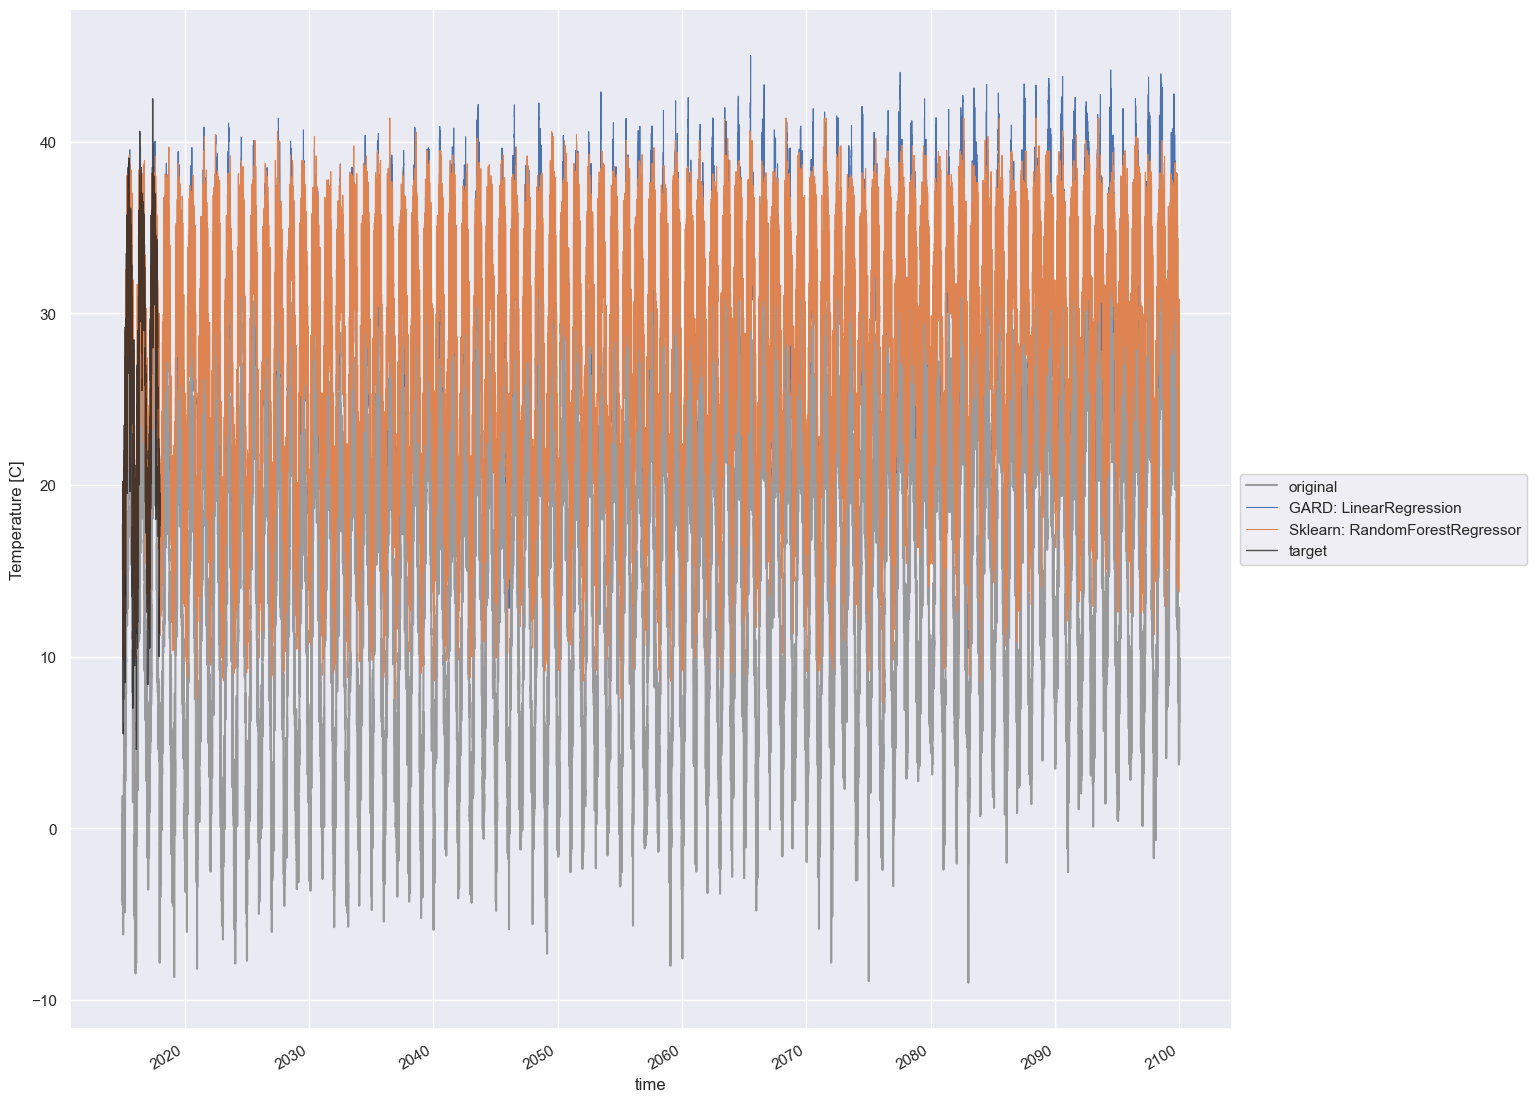

In [104]:
time_slice=slice('2015','2099')
fig, ax = plt.subplots(figsize=(15, 15))

X_predict['tasmax'][time_slice].plot(label='original', c='grey', ax=ax, alpha=0.75, legend=True)

predict_df[time_slice].plot(ax=ax, lw=0.75)
target_data['max'][time_slice].plot(ax=ax, label='target', c='k', lw=1, alpha=0.75, legend=True, zorder=10)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = ax.set_ylabel('Temperature [C]')

In [105]:
df= predict_df['Sklearn: RandomForestRegressor'] 
df.to_csv('hushe_RF_test_saidusharif.csv')

In [106]:
# calculate r2
#score = (predict_df.corrwith(target_data.max[predict_slice]) **2).sort_values().to_frame('r2_score')
#display(score)